In [313]:
#loading libraries

import numpy as np
import pandas as pd
from pandas import plotting
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets, metrics, decomposition
from sklearn.metrics import confusion_matrix, RocCurveDisplay
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, mean_absolute_error,mean_squared_error,confusion_matrix,classification_report
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [314]:
df=pd.read_csv('E:\\Machine Learning\\data.csv',encoding='latin1')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [315]:
df.drop(df.columns[[-1, 0]], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [316]:
print ("Total number of diagnosis are ", str(data.shape[0]), ", ", df.diagnosis.value_counts()['B'], "Benign and Malignant are",
       df.diagnosis.value_counts()['M'])

Total number of diagnosis are  569 ,  357 Benign and Malignant are 212


In [317]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


C:\Users\TEMP.DESKTOP-1K68KDN.002\AppData\Local\Temp\ipykernel_8976\702790382.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


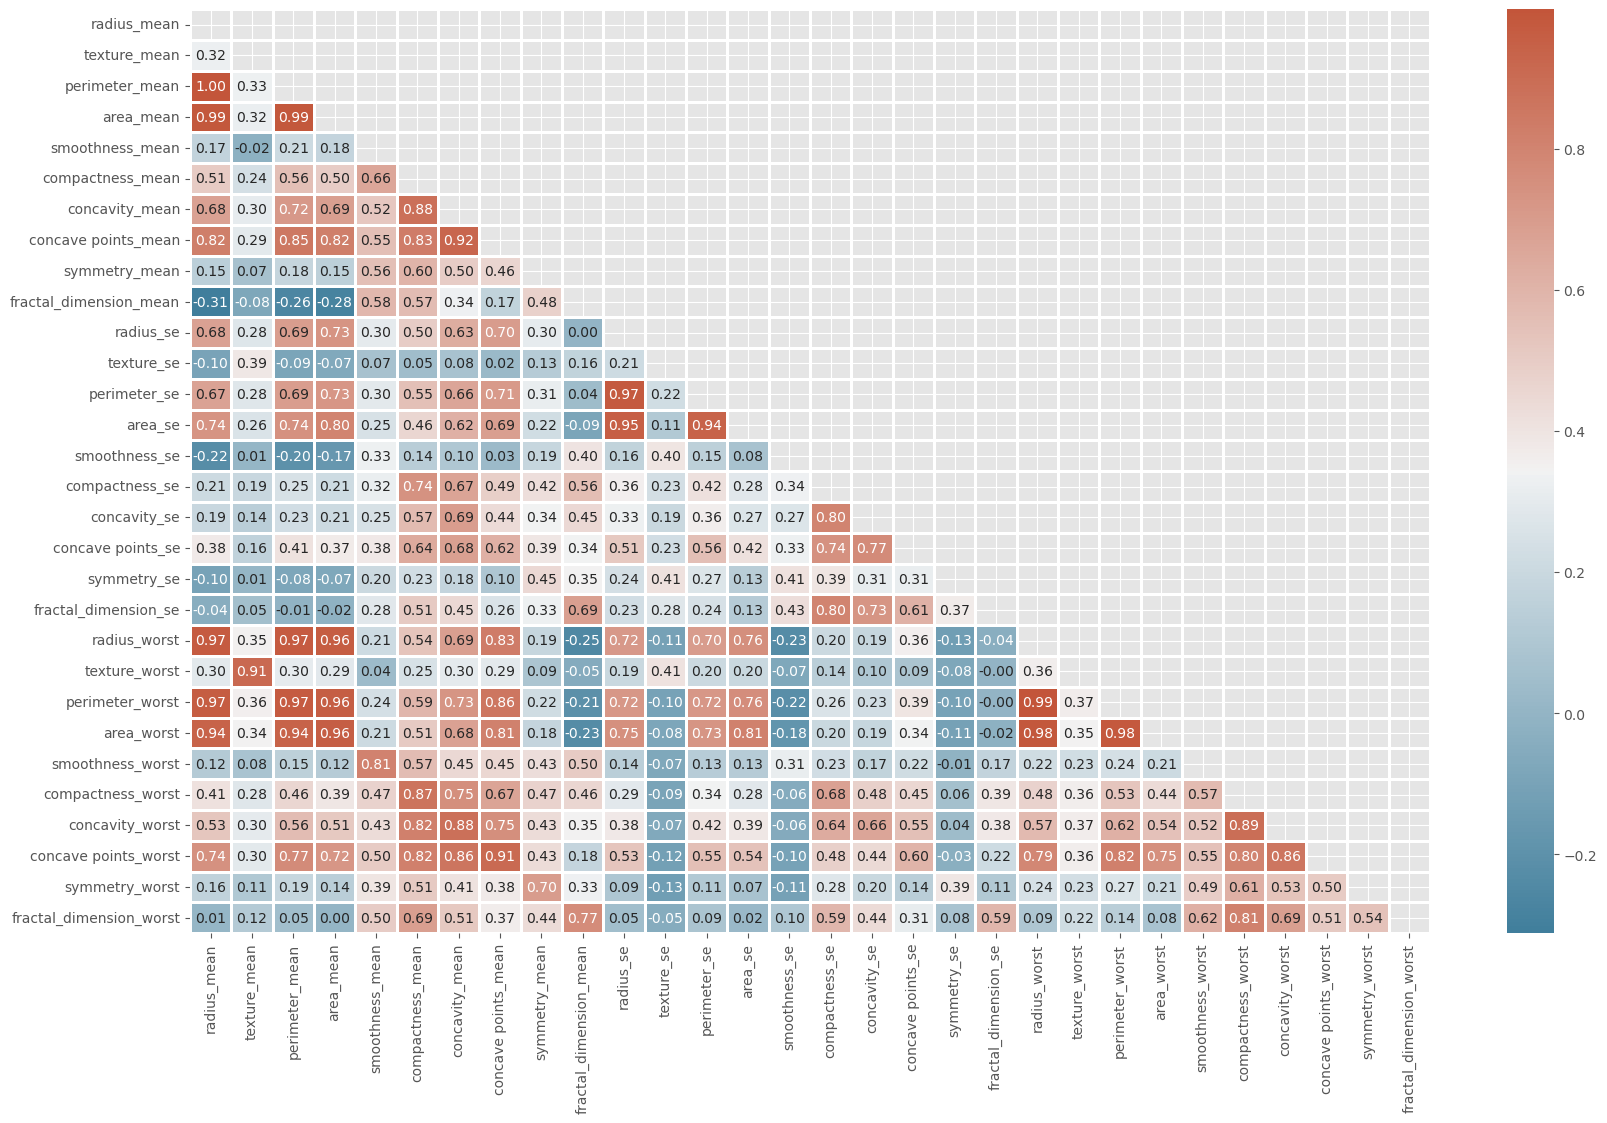

In [318]:
#Correlation heatmap between all features of the dataset

plt.figure(figsize = (20, 12))

# compute the correlation matrix
corr = df.corr()
# generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype = bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, linewidths = 1, cmap=cmap, annot = True, fmt = ".2f")
plt.show()

In [319]:
#Removing highly correlated features

corr_matrix = df.corr().abs() 

mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.90)]

df = df.drop(to_drop, axis = 1)

print(f"The reduced dataframe has {df.shape[1]} columns.")

The reduced dataframe has 21 columns.


C:\Users\TEMP.DESKTOP-1K68KDN.002\AppData\Local\Temp\ipykernel_8976\1403374538.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()


In [320]:
Y = df["diagnosis"]
X = df.drop('diagnosis', axis=1)

# Standardize our data to have a mean of 0 and standard deviation of 1
sc = StandardScaler()
X = sc.fit_transform(X)
X.shape

(569, 20)

In [321]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [322]:
log_reg = LogisticRegression(max_iter=10000)

In [323]:
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [324]:
predictions = log_reg.predict(X_test)

In [325]:
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.9824561403508771

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



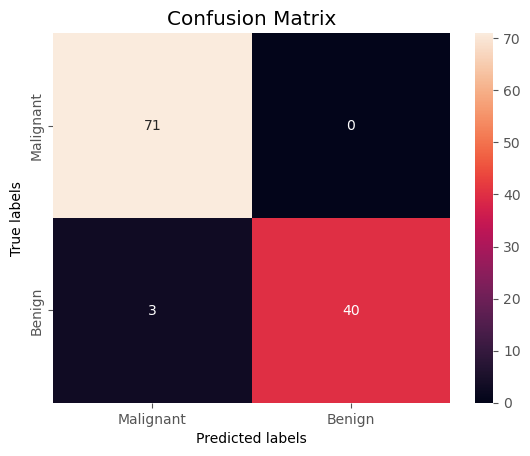

In [326]:
cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Malignant', 'Benign']); ax.yaxis.set_ticklabels(['Malignant', 'Benign']);

In [107]:
featureMeans = list(df.columns[1:11])

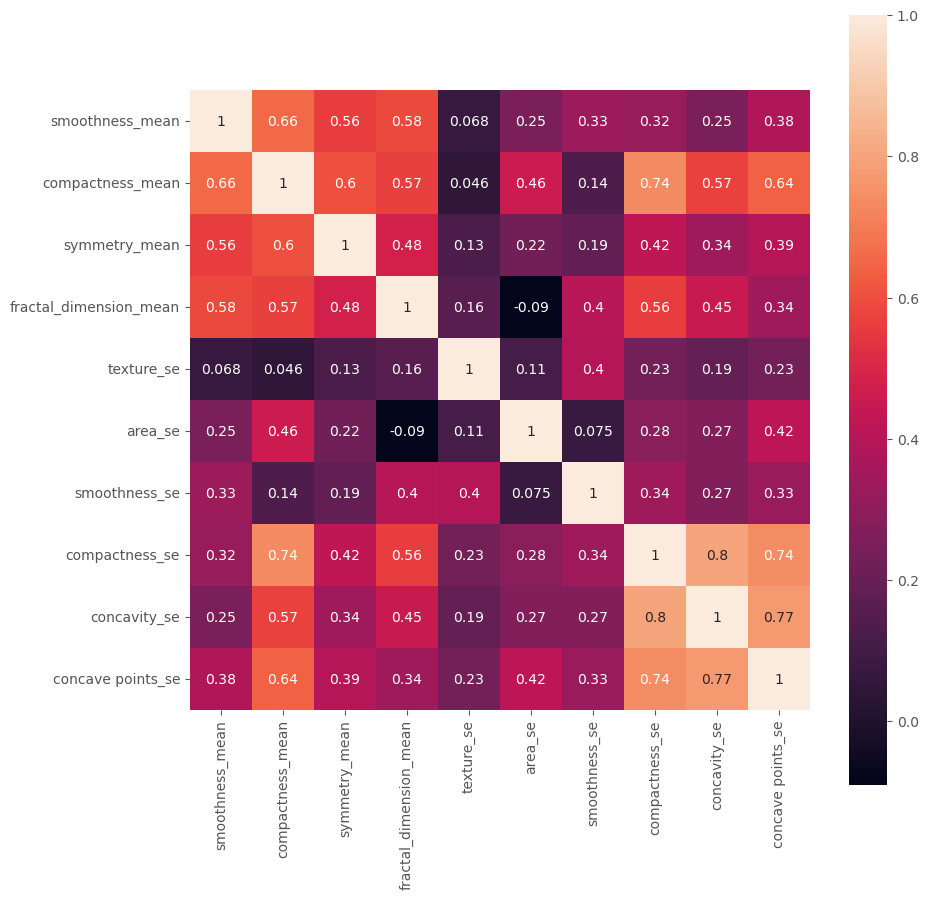

In [108]:
plt.figure(figsize=(10,10))
sns.heatmap(df[featureMeans].corr(), annot=True, square=True)
plt.show()

In [109]:
X = df.loc[:,featureMeans]
y = df.loc[:, 'diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [110]:
df=pd.read_csv('E:\\Machine Learning\\data.csv',encoding='latin1')

In [111]:
df.drop(df.columns[[-1, 0]], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [112]:
diagnosis={'M':1, 'B':0}
df['diagnosis']=[diagnosis[x] for x in df['diagnosis']]

In [113]:
from scipy import stats
r, p=stats.pearsonr(df.radius_mean, df.diagnosis)
print(r)
print(p)

0.7300285113754562
8.465940572260195e-96


In [114]:
cor_df=pd.DataFrame(columns=['r','p-value'])
for col in df:
   # print(col)
    if pd.api.types.is_numeric_dtype(df[col]):
        r, p=stats.pearsonr(df.diagnosis, df[col])
        cor_df.loc[col]=[r, p]
cor_df

,r,p-value
diagnosis,1.000000,0.000000e+00
radius_mean,0.730029,8.465941e-96
texture_mean,0.415185,4.058636e-25
perimeter_mean,0.742636,8.436251e-101
area_mean,0.708984,4.734564e-88
smoothness_mean,0.358560,1.051850e-18
compactness_mean,0.596534,3.938263e-56
concavity_mean,0.696360,9.966556e-84
concave points_mean,0.776614,7.101150e-116
symmetry_mean,0.330499,5.733384e-16


In [115]:
cor_df.sort_values(by=['p-value'], ascending=False)

,r,p-value
symmetry_se,-0.006522,8.766418e-01
texture_se,-0.008303,8.433320e-01
fractal_dimension_mean,-0.012838,7.599368e-01
smoothness_se,-0.067016,1.102966e-01
fractal_dimension_se,0.077972,6.307355e-02
concavity_se,0.253730,8.260176e-10
compactness_se,0.292999,9.975995e-13
fractal_dimension_worst,0.323872,2.316432e-15
symmetry_mean,0.330499,5.733384e-16
smoothness_mean,0.358560,1.051850e-18


In [116]:
col=['symmetry_se', 'texture_se']
X=df.drop(col, axis=1)
y=df['diagnosis']
X_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
lr=LogisticRegression()
lr.fit(X_train, y_train)

C:\ProgramData\anaconda3\anacondaa\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [118]:
y_pred=lr.predict(X_train)

In [119]:
print("Accuracy Score:-", metrics.accuracy_score(y_train, y_pred))
print("F1 Score:-", metrics.f1_score(y_train, y_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_train, y_pred))
print("Log Loss:-", metrics.log_loss(y_train, y_pred))
print("Precision Score:-", metrics.precision_score(y_train, y_pred))
print("Recall Score:-", metrics.recall_score(y_train, y_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_train, y_pred))

Accuracy Score:- 0.989010989010989
F1 Score:- 0.9852507374631269
Average Precision Score:- 0.9751230669782706
Log Loss:- 0.3960841031771118
Precision Score:- 0.9823529411764705
Recall Score:- 0.9881656804733728
ROC-AUC Score:- 0.988838084991931


In [120]:
y_test_pred=lr.predict(x_test)

In [327]:
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report

In [328]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [329]:
log_reg = LogisticRegression(max_iter=10000)

In [330]:
num_features_to_select = 10  
rfe = RFE(log_reg, n_features_to_select=num_features_to_select)

In [331]:
rfe = rfe.fit(X_train, y_train)

In [332]:
#selected features
selected_features = [index for index, value in enumerate(rfe.support_) if value]
#Filter the dataset with selected features
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

In [333]:
#logistic Regression with selected features
log_reg.fit(X_train_selected, y_train)

LogisticRegression(max_iter=10000)

In [334]:
predictions = log_reg.predict(X_test_selected)

In [335]:
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.9736842105263158

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [336]:
#PCA
n_components = 5
pca = decomposition.PCA(n_components=n_components)
pca.fit(X)
components = pca.transform(X)

columns = []
for i in range(n_components):
  columns.append(f'PC_{i+1}')

In [267]:
#Checking feature importance
#columns=PC

feature_importance = pd.DataFrame(pca.components_.T, index=None, columns=None)
feature_importance

,0,1,2,3,4
0,0.231749,0.029707,-0.226315,-0.301459,0.289574
1,0.323850,-0.074074,0.003800,0.004591,0.063654
2,0.229474,0.061742,-0.140773,-0.300389,0.027110
3,0.221905,0.305740,-0.262968,0.075218,0.007140
4,0.043104,0.267381,0.285782,-0.351113,-0.437686
5,0.146408,-0.210216,0.393022,-0.246915,0.256760
6,0.086964,0.377203,0.078383,-0.268353,0.196659
7,0.279191,0.175674,0.184663,0.226843,-0.052663
8,0.244608,0.157831,0.246818,0.273336,0.000856
9,0.246660,0.101105,0.314206,0.085732,0.171792


In [268]:
total_var = pca.explained_variance_ratio_.sum() * 100
total_var

81.54089542285452

In [269]:
variance_ratios = pd.DataFrame(pca.explained_variance_ratio_.reshape(1,n_components), columns=columns, index=['Explained Variance Ratio'])
variance_ratios

,PC_1,PC_2,PC_3,PC_4,PC_5
Explained Variance Ratio,0.417505,0.15068,0.108806,0.075913,0.062505


Text(158.22222222222223, 0.5, 'Features')

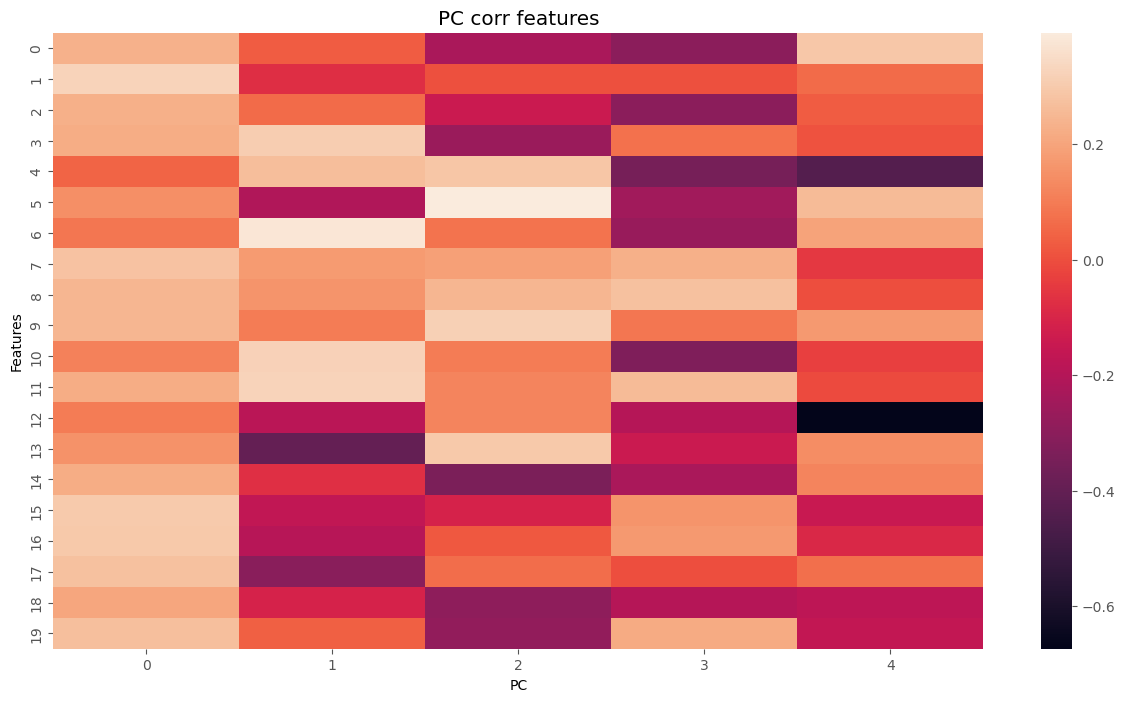

In [194]:
#Heatmap visualization of feature importance
plt.figure(figsize=(15, 8))
sns.heatmap(feature_importance)
plt.title('PC corr features')
plt.xlabel('PC')
plt.ylabel('Features')

In [270]:
X_train, X_test, y_train, y_test = train_test_split(components, Y, test_size=0.2, shuffle=False, random_state=42)

In [271]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [272]:
y_pred = lr.predict(X_test)

In [273]:
PCA=print(
    f"Classification report for classifier {lr}:\n"
    f"{metrics.classification_report(y_test, y_pred)}\n"
)

Classification report for classifier LogisticRegression(random_state=42):
              precision    recall  f1-score   support

           B       1.00      0.99      0.99        88
           M       0.96      1.00      0.98        26

    accuracy                           0.99       114
   macro avg       0.98      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114




In [274]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 1)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [275]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: '+ str(accuracy_score(y_test, y_pred)))

[[87  1]
 [ 0 26]]
Accuracy: 0.9912280701754386


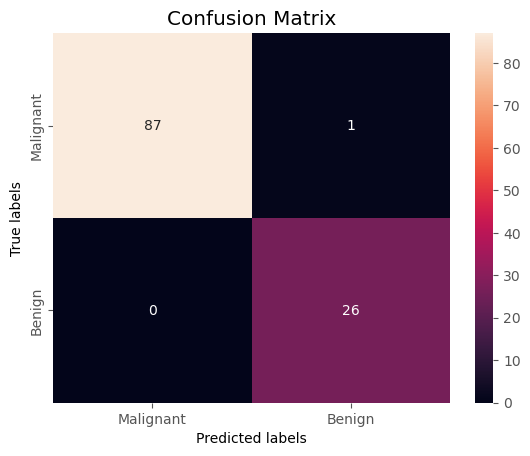

In [276]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax); 

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Malignant', 'Benign']); ax.yaxis.set_ticklabels(['Malignant', 'Benign']);

In [277]:
X_train, X_test, y_train, y_test = train_test_split(components, Y, test_size=0.2, shuffle=False, random_state=42)

In [278]:
lr = LogisticRegression(random_state=None)
lr.fit(X_train, y_train)

LogisticRegression()

In [279]:
y_pred = lr.predict(X_test)

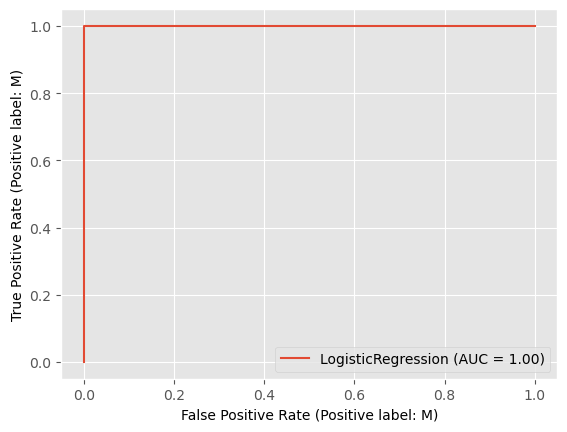

In [207]:
RocCurveDisplay.from_estimator(lr, X_test, y_test)
plt.show()

In [ ]:
# Eigenvalues
Eigen_Values = pca.explained_variance_
ell = pca.explained_variance_ratio_


# Scree plot
plt.subplots(1, 2, figsize = (20, 10))

ax1 = plt.subplot(1, 2, 1)
x = np.arange(len(Eigen_Values)) + 1
ax1.plot(x, Eigen_Values / Eigen_Values.sum(), 'ro-', lw=2)
ax1.set_xticks(x, ["" + str(i) for i in x])
ax1.set_xlabel('Number of components')
ax1.set_ylabel('Explained variance')
ax1.set_title('Scree Plot')

In [337]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [338]:
pca = PCA(n_components=10) 
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [339]:
# Logistic Regression on the reduced dataset
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_pca, y_train)

LogisticRegression(max_iter=10000)

In [340]:
predictions = log_reg.predict(X_test_pca)

In [341]:
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.9824561403508771

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [342]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [343]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [344]:
#LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [345]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [346]:
# Predictions
lda_predictions = lda.predict(X_test)
log_reg_predictions = log_reg.predict(X_test)

In [347]:
print("Accuracy:", accuracy_score(y_test, lda_predictions))
print("\n Classification Report:")
print(classification_report(y_test, lda_predictions))

Accuracy: 0.956140350877193

 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



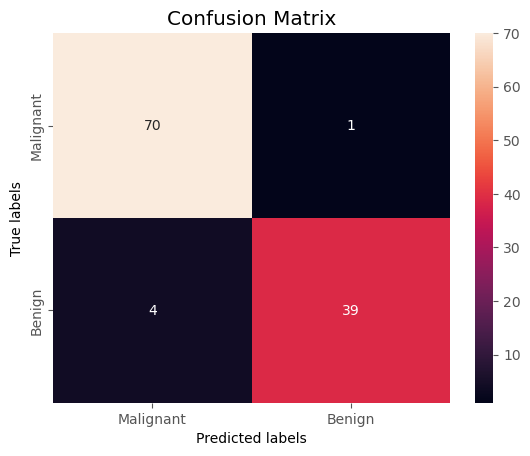

In [348]:
cm = confusion_matrix(y_test, lda_predictions)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Malignant', 'Benign']); ax.yaxis.set_ticklabels(['Malignant', 'Benign']);

In [359]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import precision_score, recall_score
from tabulate import tabulate

# Initialize models
log_reg = LogisticRegression(max_iter=10000)
rfe = RFE(LogisticRegression(max_iter=10000), n_features_to_select=10)
lda = LinearDiscriminantAnalysis()

models = [log_reg, rfe, lda]
model_names = ['Logistic Regression', 'Backward Selection', 'LDA']

# Calculate precision and recall scores for each model
precision_scores = []
recall_scores = []

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision_scores.append(precision)
    recall_scores.append(recall)

# Create a table
table_data = []
for i in range(len(models)):
    table_data.append([model_names[i], precision_scores[i], recall_scores[i]])

headers = ["Model", "Precision", "Recall"]
table = tabulate(table_data, headers)

print(table)


Model                  Precision    Recall
-------------------  -----------  --------
Logistic Regression        1      0.953488
Backward Selection         1      0.930233
LDA                        0.975  0.906977
